In [1]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.set_printoptions(threshold=np.inf)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Loading and Transforming Data 

In [2]:
#Loading data
communitydata = pd.read_csv(r'C:\Users\under\OneDrive\Documents\CAB420\CAB420_Assessment1A_Data\Data\Q1\communities.csv')

#Removing whitespaces
communitydata.rename(columns=lambda x: x.strip(), inplace=True)
communitydata = communitydata.rename(columns=lambda x: x.strip())
#counting Questionmarks
questionmark_count = communitydata['PctPolicWhite'].value_counts()['?']
num_rows, num_cols = communitydata.shape
print("Number of ?:", questionmark_count, "\nTotal number of rows:", num_rows, "\nRows containing data:" ,
      num_rows - questionmark_count)

# Y = wine['ViolentCrimesPerPop']
# X_train,X_test, Y_train,  Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

Number of ?: 1675 
Total number of rows: 1994 
Rows containing data: 319


In [3]:
#Get all columns
column_names = communitydata.columns
# print(list(column_names))

In [4]:
#Remove columns with "?"
questionmark_count = 0

communitydata = communitydata.drop(columns=['fold', 'state', 'communityname string', 'community', 'county'])
column_names = communitydata.columns
column_with_lessthan_fifty_questionmarks = []

print("Remaining columns: ",list(column_names))
for index, elem in enumerate(column_names):
    try:
        questionmark_count = communitydata[elem].value_counts()['?']
        #need to look at this, some with only 50 ?
        #Check column of question marks, if it is greater than 50, remove whole column
        if(questionmark_count > 50):
            
            del communitydata[elem]
        elif(questionmark_count <=50 or questionmark_count > 0):
            column_with_lessthan_fifty_questionmarks.append(elem)
            
    except:
        pass
        
column_names = communitydata.columns
# print(len(column_names))

Remaining columns:  ['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargH

In [5]:
#print out all columns with less than 50 '?'
print(column_with_lessthan_fifty_questionmarks)

['OtherPerCap']


In [6]:
# remove the rows that are afflicted by columns less than 50 '?'
communitydata = communitydata[communitydata.OtherPerCap != '?']

# Training and Finding Best Fit - Linear Regression

Model 1 RMSE for Validation = 0.14117668570708608
Model 1 RMSE for Test = 0.1474005938347445
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          4.48e-235
Time:                        00:22:15   Log-Likelihood:                 802.63
No. Observations:                1195   AIC:                            -1403.
Df Residuals:                    1094   BIC:                            -889.6
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

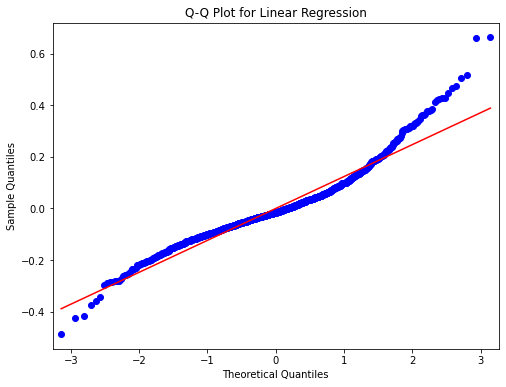

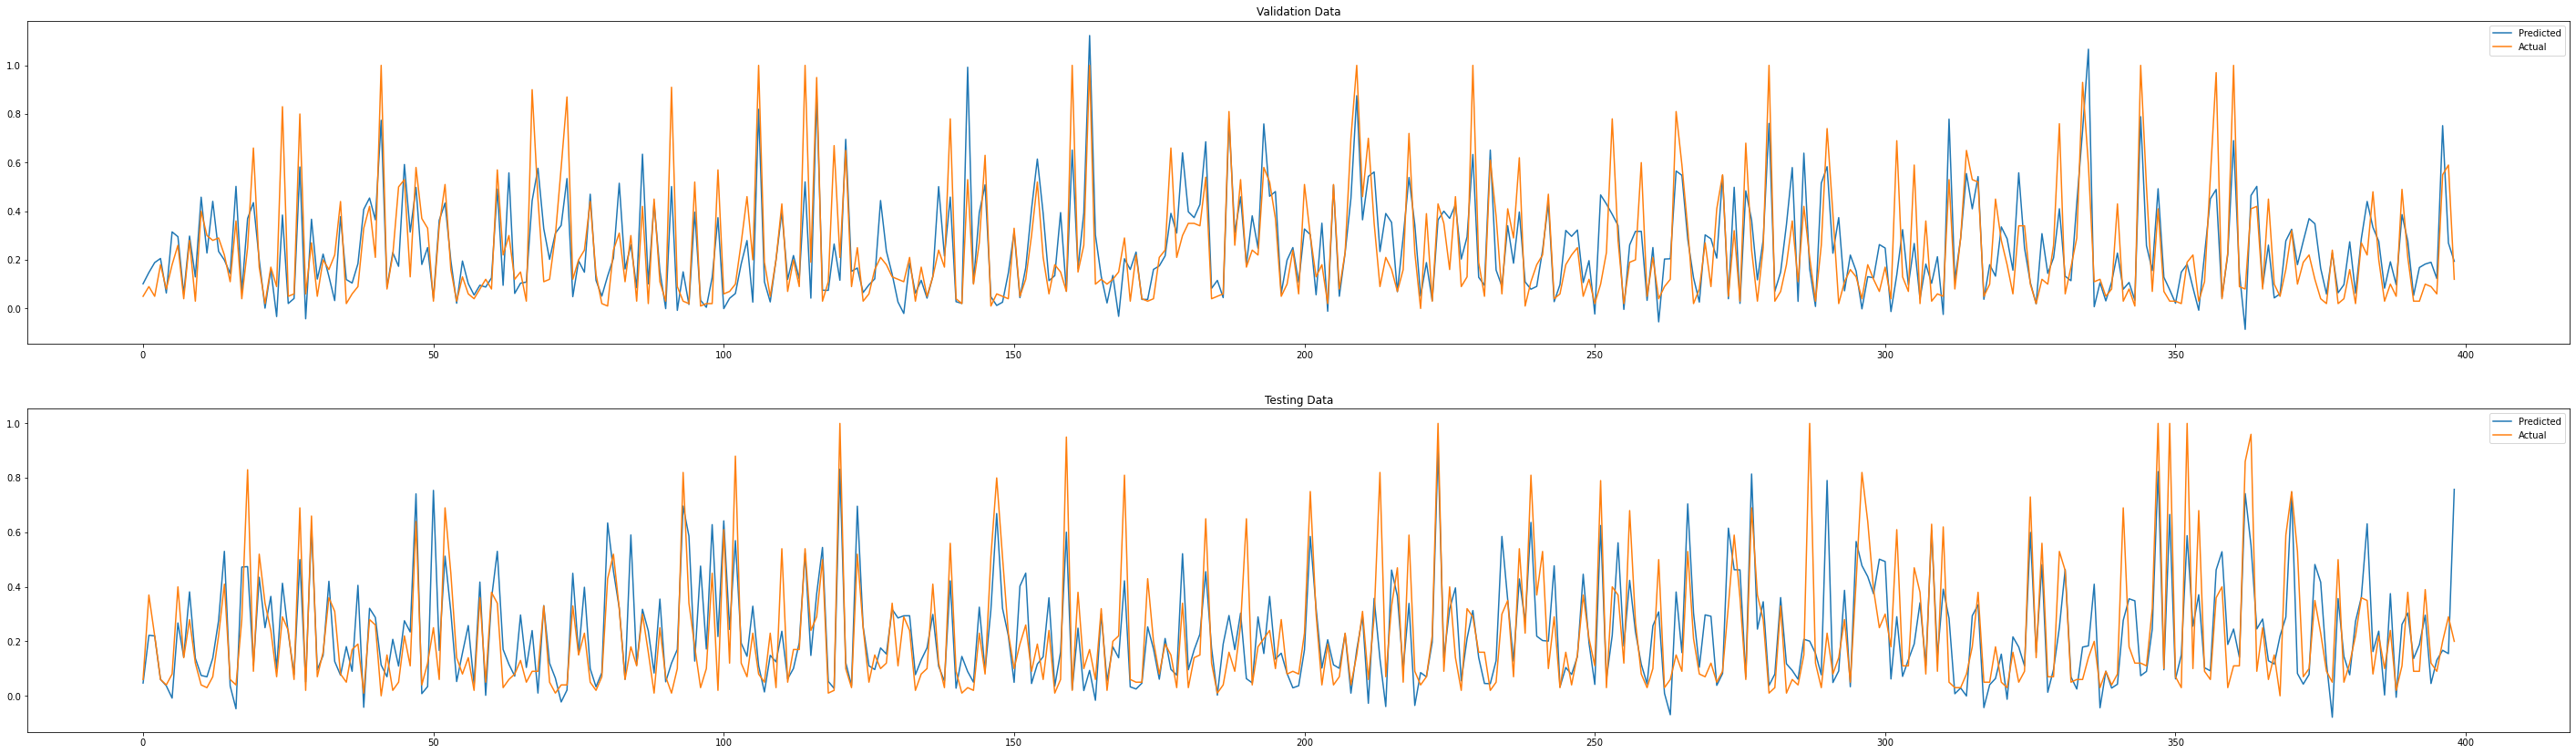

In [7]:
#Split data into train test validation
# Reference - 60%, 20%, 20% Split for test, val, train
y = communitydata['ViolentCrimesPerPop']
X = communitydata.drop('ViolentCrimesPerPop', axis=1)

def trainingdata (modelNo, predictors, predictionColumn):
    X_train, X_test, y_train, y_test = train_test_split(predictors, predictionColumn, test_size=0.2, random_state=1)
    X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    # Casting to Array type
    y_train = np.array(y_train, dtype=np.float64)
    X_train = np.array(X_train, dtype=np.float64)
    Y_val = np.array(Y_val, dtype=np.float64)
    X_val = np.array(X_val, dtype=np.float64)
    X_test = np.array(X_test, dtype=np.float64)
    y_test = np.array(y_test, dtype=np.float64)
    # Adding constants to the model
    X_val = sm.add_constant(X_val)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_train)
    # fit the model without any regularisation
    model_1_fit = model.fit()
    pred = model_1_fit.predict(X_val)
    print('Model ' +modelNo +' RMSE for Validation = {}'.format(
    np.sqrt(mean_squared_error(Y_val, model_1_fit.predict(X_val)))))
    print('Model '+ modelNo + ' RMSE for Test = {}'.format(
    np.sqrt(mean_squared_error(y_test, model_1_fit.predict(X_test)))))
    print(model_1_fit.summary())
#     print(model_1_fit.params)
    fig, ax = plt.subplots(figsize=(8,6))
    sm.qqplot(model_1_fit.resid, ax=ax, line='s')
    plt.title('Q-Q Plot for Linear Regression')
    plt.show()
    fab = plt.figure(figsize=[50, 30])
    bx = fab.add_subplot(4, 1, 1)
    bx.plot(pred, label='Predicted')
    bx.plot(Y_val, label='Actual')
    bx.legend()
    bx.set_title('Validation Data')
    bx = fab.add_subplot(4, 1, 2)
    bx.plot(model_1_fit.predict(X_test), label='Predicted')
    bx.plot(y_test, label='Actual')
    bx.legend()
    bx.set_title('Testing Data')
trainingdata('1', X, y)

<Figure size 432x288 with 0 Axes>

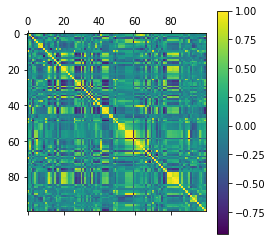

In [8]:
# Show the correlation between the Coefficients
def getcorr (columns):
    corr_coeffs = communitydata[columns].corr()
    return corr_coeffs
new_corr = getcorr(communitydata.columns)
plt.figure()
plt.matshow(new_corr)
plt.colorbar()

In [9]:
# remove var based on their high correlation
def removehighcorrVar (corr_coeffs, data_columns):
    columns = np.full((corr_coeffs.shape[0],), True, dtype=bool)
    for i in range(corr_coeffs.shape[0]):
        for j in range(i+1, corr_coeffs.shape[0]):
            if corr_coeffs.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data_columns[columns]
    return selected_columns
new_columns = removehighcorrVar(new_corr, X.columns)

<Figure size 432x288 with 0 Axes>

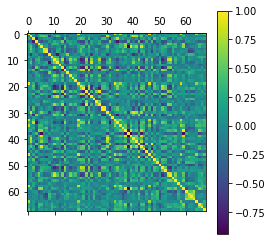

In [10]:
new_corr = getcorr(new_columns)
plt.figure()
plt.matshow(new_corr)
plt.colorbar()

Model 2 RMSE for Validation = 0.13800293289151652
Model 2 RMSE for Test = 0.14935145154228768
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     37.88
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          1.97e-244
Time:                        00:22:18   Log-Likelihood:                 766.64
No. Observations:                1195   AIC:                            -1393.
Df Residuals:                    1125   BIC:                            -1037.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

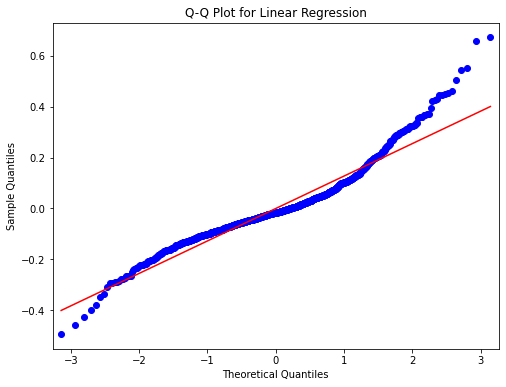

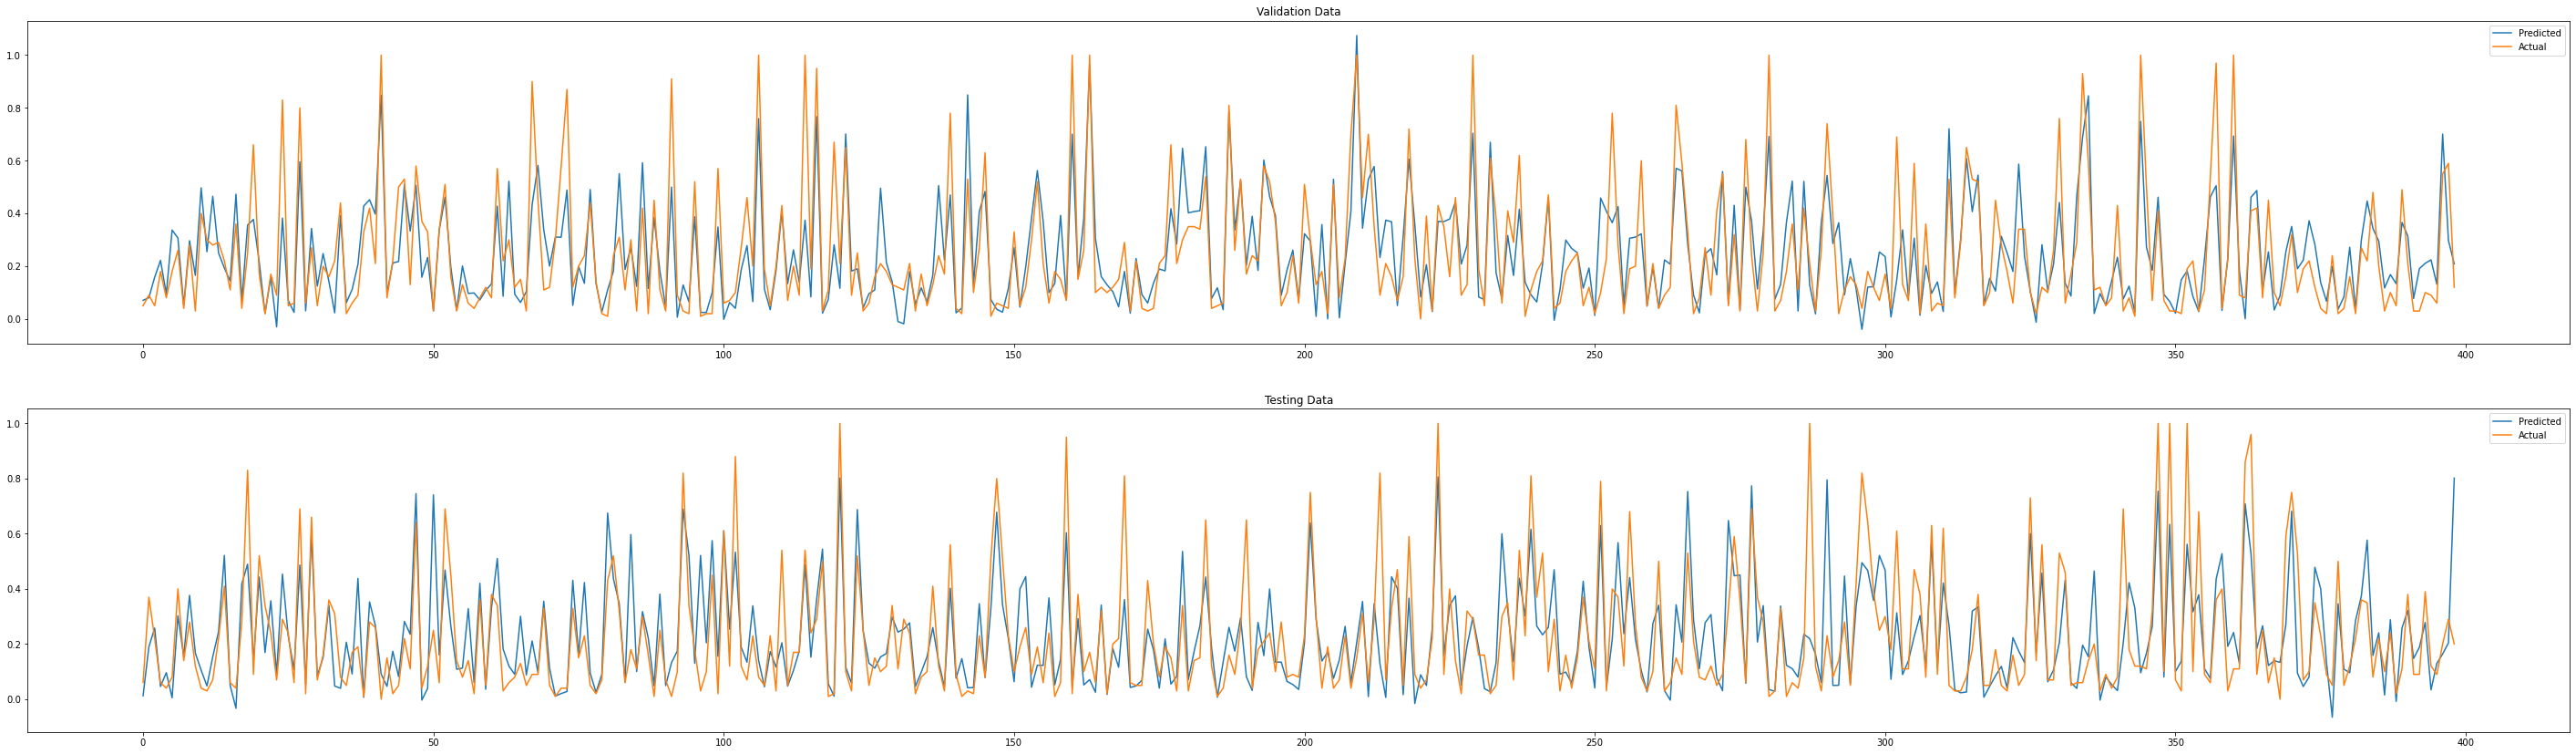

In [11]:
# Train new data after removing var with high correlation
X = X[new_columns]
trainingdata('2', X,  y)

In [12]:
# Backward Elimination to remove var with large p-value one at a time
def backwardElimination(x, Y, sl, columns):
    numVars = len(x.values[0])
    x = np.array(x, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, afterelim_columns = backwardElimination(X,y, SL, new_columns)

Model 3 RMSE for Validation = 0.1368746237213597
Model 3 RMSE for Test = 0.14497300906059427
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     98.39
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          2.46e-272
Time:                        00:22:22   Log-Likelihood:                 742.24
No. Observations:                1195   AIC:                            -1430.
Df Residuals:                    1168   BIC:                            -1293.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

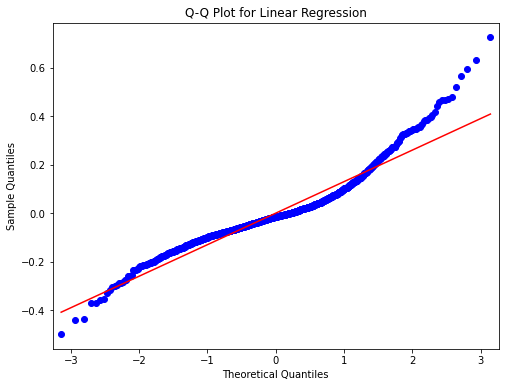

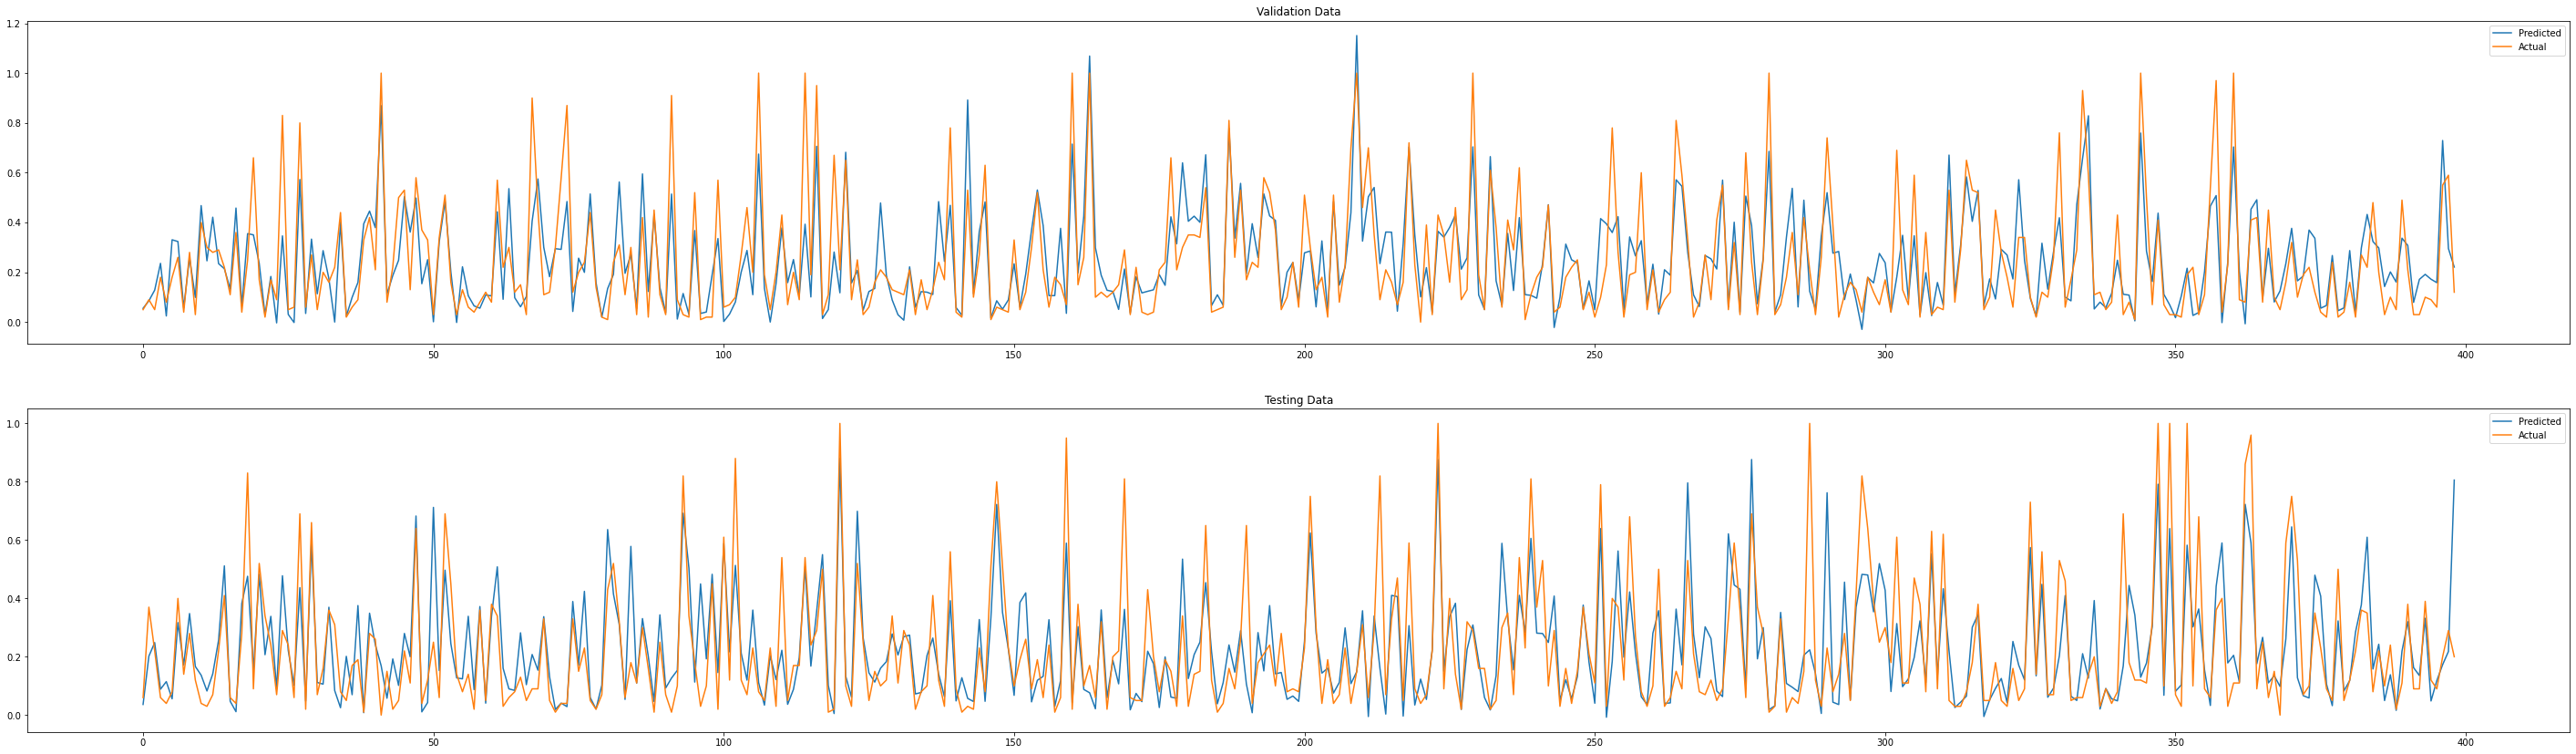

In [13]:
# put new data in the data frame and train new data
new_data = pd.DataFrame(data = data_modeled, columns = afterelim_columns)
trainingdata('3',new_data, y)

# Lasso Regression & Ridge Regression - Regulisation

In [14]:
def standardise(data):
  """ Standardise/Normalise data to have zero mean and unit variance

  Args:
    data (np.array):
      data we want to standardise (usually covariates)

    Returns:
      Standardised data, mean of data, standard deviation of data
  """
  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)
  scaled = (data - mu) / sigma
  return scaled, mu, sigma

In [15]:
X = communitydata.drop('ViolentCrimesPerPop', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
y_train = np.array(y_train, dtype=np.float64)
X_train = np.array(X_train, dtype=np.float64)
Y_val = np.array(Y_val, dtype=np.float64)
X_val = np.array(X_val, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

X_train_std, mu_train, sigma_train = standardise(X_train)
Y_train_std, mu_test, sigma_test = standardise(y_train)
X_val_std = (X_val - mu_train)/sigma_train
Y_val_std = (Y_val - mu_test)/sigma_test
X_test_std = (X_test - mu_train)/sigma_train
Y_test_std = (y_test - mu_test)/sigma_test

In [25]:
def evaluate_regularisation(x_train, y_train, x_val, y_val, x_test, y_test,
                            mu_test, sigma_test, alpha_list, L1_L2):
  # the L1_L2 variable determines if we will be using ridge or lasso
  # Ridge: L1_L2 = 0
  # Lasso: L1_L2 = 1
  # create the model
  model = sm.OLS(y_train, sm.add_constant(x_train))
  best_rmse = 10e12
  best_alpha = []
  rmse_val = []
  rmse_train = []
  best_coeffs = []
  for alpha in alpha_list:
    model_cross_fit = model.fit_regularized(alpha=alpha, L1_wt=L1_L2)
    train_pred = model_cross_fit.predict(sm.add_constant(x_train))
    val_pred = model_cross_fit.predict(sm.add_constant(x_val))
    # want to append the rmse value to a list, as will plot all values later on
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    # if this is the model with the lowest RMSE, lets save it
    # the [-1] index says get the last value from the list (which is the most recent RMSE)
    if rmse_val[-1] < best_rmse:
      best_rmse = rmse_val[-1]
      best_alpha = alpha
      best_coeffs = model_cross_fit.params
  print(best_alpha)
  print('Best values on Validation Data set')
  model_rescaled = sm.OLS(y_train * sigma_test + mu_test,
                          sm.add_constant(x_train* sigma_test + mu_test))
  model_best_fit = model_rescaled.fit_regularized(alpha=alpha * sigma_test, L1_wt=1)

  # extract the gradient and the bias from the coefficients
  # The reshape will make sure the slope is a column vector
  slope = np.array(best_coeffs[1:]).reshape(-1, 1)
  # the intercept coefficient is the last index variable, which was included with the
  # sm.add_constant() method
  intercept = best_coeffs[0]
  # use the @ operator to perform vector/matrix multiplication
  pred_val_rescaled = (x_val @ slope + intercept) * sigma_test + mu_test
  pred_train_rescaled = (x_train @ slope + intercept) * sigma_test + mu_test
  best_r2 = r_squared(y_train * sigma_test + mu_test, pred_train_rescaled)
  best_adj_r2 = adj_r2(y_train * sigma_test + mu_test, pred_train_rescaled,
                           x_train.shape[0], x_train.shape[1]) 
  best_val_rmse = np.sqrt(mean_squared_error(y_val* sigma_test + mu_test, pred_val_rescaled))
  print('Best R Squared = {}'.format(best_r2))
  print('Best Adjusted = {}'.format(best_adj_r2))
  print('Best RMSE (val) = {}'.format(best_val_rmse))
  print('Best slope = {}'.format(slope))
  print('Best Intercept = {}'.format(intercept))

  fig, axs = plt.subplots(3)
  axs[0].plot(np.array(alpha_list), rmse_train)
  axs[0].plot(np.array(alpha_list), rmse_val)
  axs[0].legend(['Training', 'Validation'])
  axs[0].set_title('RMSE vs Lambda')
  axs[0].set_xlabel('Lambda')
  axs[0].set_ylabel('RMSE')    
  
  axs[1].plot((y_test*sigma_test + mu_test))
  axs[1].plot(model_best_fit.predict(sm.add_constant(x_test* sigma_test + mu_test)))
  axs[1].legend(['Actual', 'Predicted'])
  axs[1].set_title('Test Set Performance')
  

  train_pred = model_cross_fit.predict(sm.add_constant(x_val))
  resid = y_val - train_pred
  sm.qqplot(resid, ax=axs[2], line='s')
  axs[2].set_title('Q-Q Plot for Linear Regression')

In [17]:
def rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

def adj_r2(actual, predicted, n, p):
  r2 = r2_score(actual, predicted)
  adjr2 = 1 - (1 - r2) * (n - 1) / (n - p - 1);
  return adjr2

0.1
Best values on Validation Data set
Best R Squared = 0.6976569658194891
Best Adjusted = 0.6700204910315082
Best RMSE (val) = 0.1372688387641036
Best slope = [[-0.00897223]
 [ 0.024487  ]
 [ 0.14472315]
 [-0.09983169]
 [ 0.01515566]
 [ 0.00969823]
 [ 0.01412193]
 [-0.04455443]
 [-0.00065025]
 [ 0.04616226]
 [-0.01270025]
 [ 0.05956197]
 [ 0.00599873]
 [-0.04011599]
 [ 0.00582467]
 [-0.06499455]
 [ 0.03169229]
 [ 0.04582535]
 [-0.03727879]
 [ 0.01042218]
 [-0.01021422]
 [-0.01886682]
 [-0.01081442]
 [-0.01332061]
 [ 0.03230912]
 [ 0.02845316]
 [ 0.02679873]
 [-0.02294078]
 [-0.04912   ]
 [-0.01065799]
 [-0.00111533]
 [-0.00548094]
 [-0.01820821]
 [ 0.07412429]
 [-0.00946285]
 [-0.0087212 ]
 [ 0.00106433]
 [ 0.00509118]
 [ 0.04787186]
 [ 0.03850889]
 [-0.01022509]
 [ 0.01194414]
 [ 0.01861629]
 [-0.06733007]
 [-0.09197276]
 [-0.02912836]
 [-0.03404647]
 [-0.00409746]
 [-0.05695792]
 [-0.01796819]
 [ 0.16191872]
 [-0.02101736]
 [ 0.00206486]
 [ 0.02727368]
 [-0.00407948]
 [ 0.02219704]


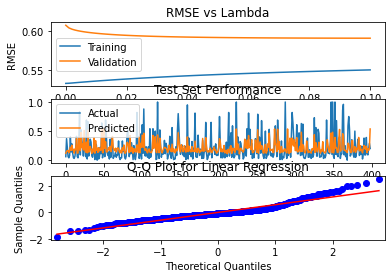

In [53]:
# Ridge
alpha_list = np.linspace(0,0.1, 100)
evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_test, sigma_test, alpha_list, 0)

0.011111111111111112
Best values on Validation Data set
Best R Squared = 0.678819894346617
Best Adjusted = 0.6494615665903662
Best RMSE (val) = 0.1393893087637773
Best slope = [[ 0.        ]
 [ 0.        ]
 [ 0.10677831]
 [-0.16554182]
 [ 0.        ]
 [ 0.01230086]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.0606279 ]
 [ 0.        ]
 [-0.06135793]
 [ 0.        ]
 [-0.0874512 ]
 [ 0.        ]
 [ 0.06188357]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.01747208]
 [ 0.02417549]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.09063916]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.02905576]
 [ 0.        ]
 [ 0.29440548]
 [ 0.        ]
 [ 0.        ]
 [ 0.02373846]
 [ 0.        ]

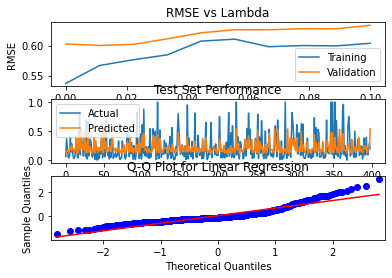

In [54]:
# Lasso
alpha_list = np.linspace(0,0.1, 10)
evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_test, sigma_test, alpha_list, 1)

linear val RMSE = 0.6079140113937643
linear test RMSE = 0.6347144773310476


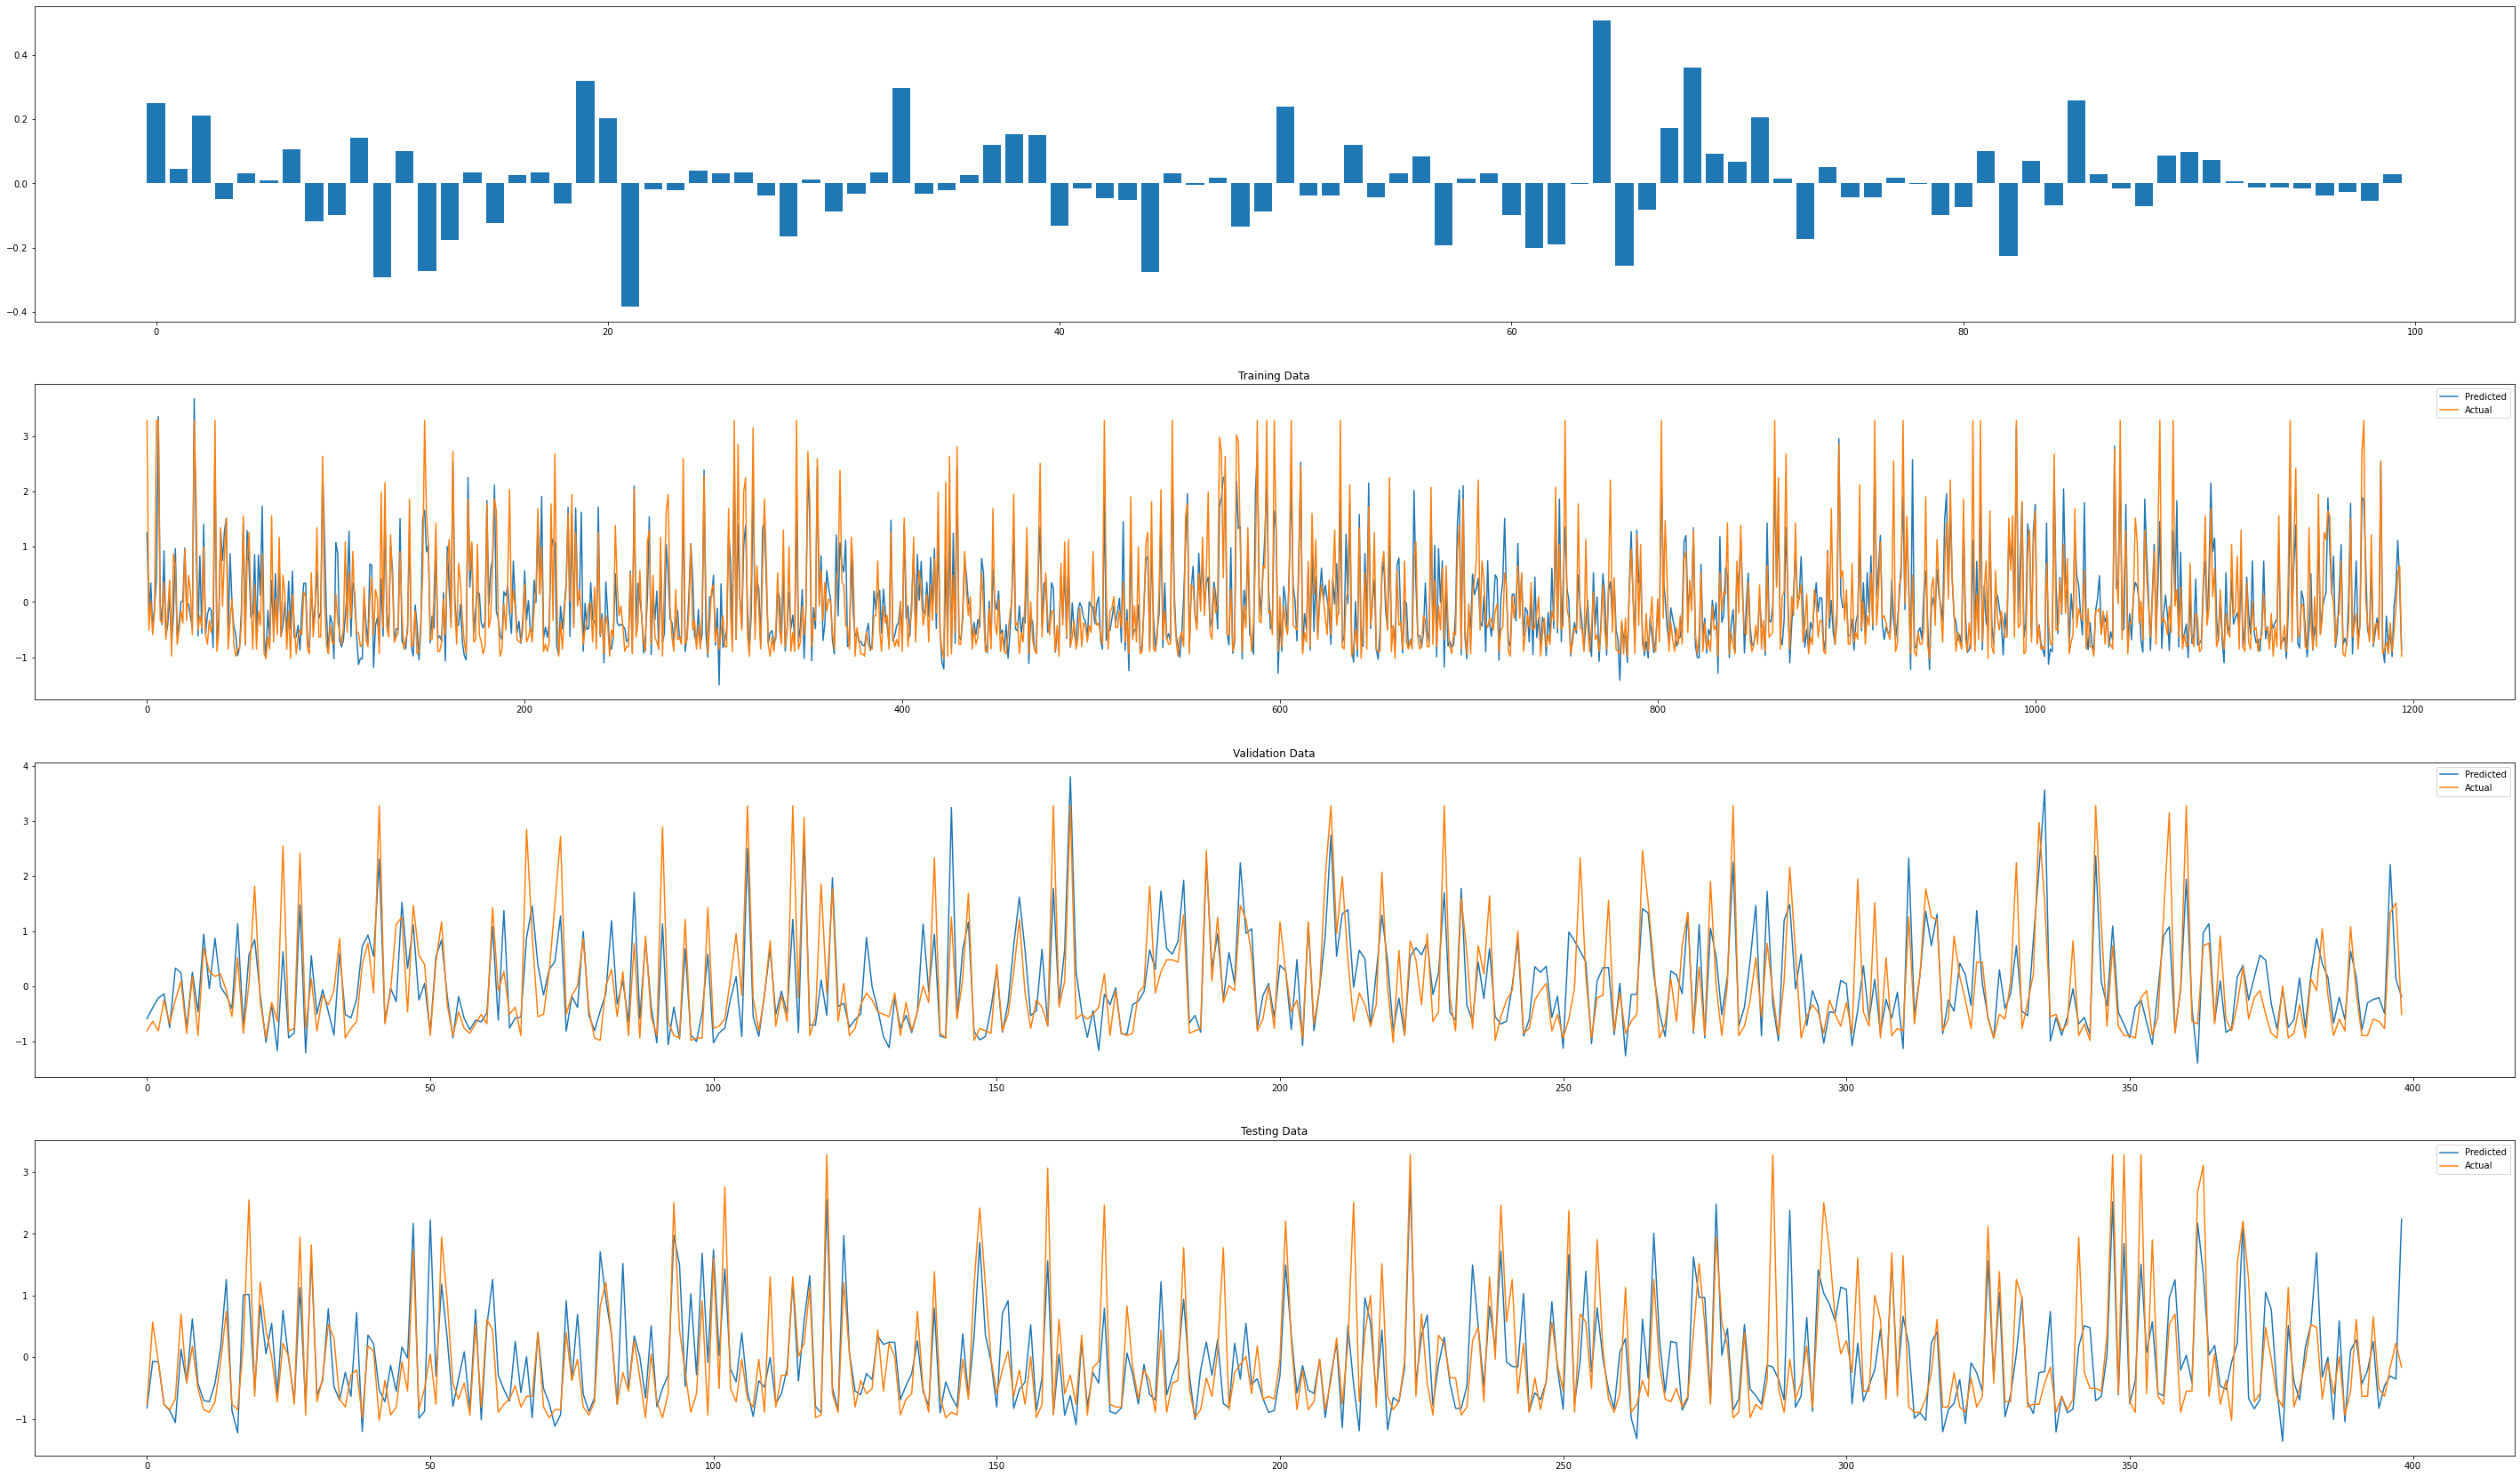

In [36]:
linear = LinearRegression(fit_intercept = False).fit(X = X_train_std, y = Y_train_std)
fig = plt.figure(figsize=[50, 30])
ax = fig.add_subplot(4, 1, 1)
ax.bar(range(len(linear.coef_)), linear.coef_)
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train_std), label='Predicted')
ax.plot(Y_train_std, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val_std), label='Predicted')
ax.plot(Y_val_std, label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test_std), label='Predicted')
ax.plot(Y_test_std, label='Actual')
ax.set_title('Testing Data')
ax.legend();
print('linear val RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, linear.predict(X_val_std)))))
print('linear test RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_test_std, linear.predict(X_test_std)))))

linear RMSE = 0.6079140113937643
lasso_mode_1 RMSE = 0.5960205543857849
lasso_mode_2 RMSE = 0.5950566548335604
lasso_mode_3 RMSE = 0.6319150038488567


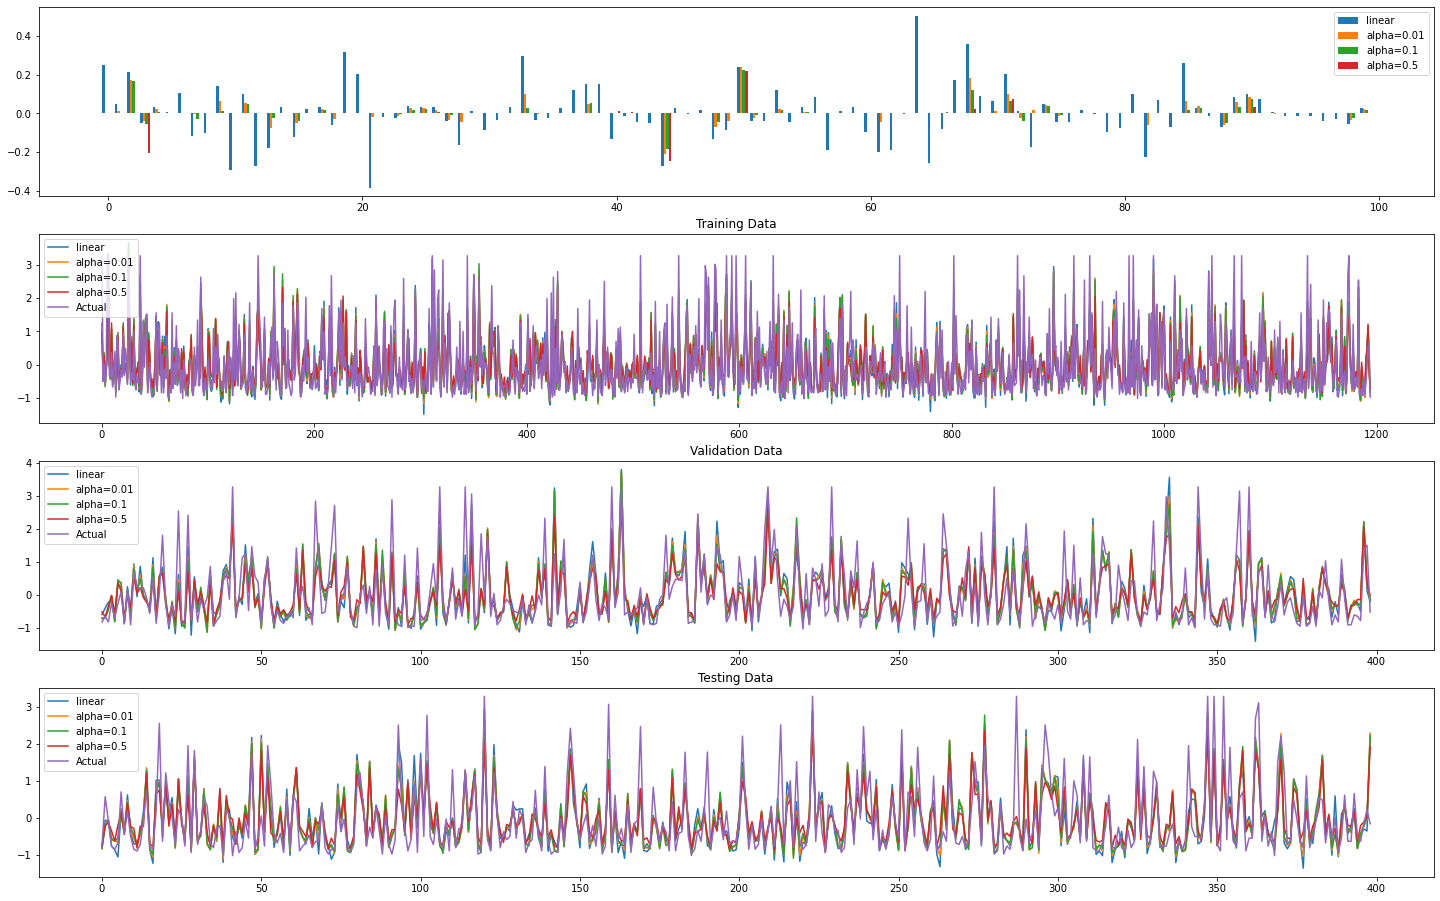

In [55]:
lasso_model_1 = Lasso(fit_intercept=False, alpha=0.005).fit(X = X_train_std, y = Y_train_std)
lasso_model_2 = Lasso(fit_intercept=False, alpha=0.01).fit(X = X_train_std, y = Y_train_std)
lasso_model_3 = Lasso(fit_intercept=False, alpha=0.1).fit(X = X_train_std, y = Y_train_std)

fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
w = 0.2
pos = np.arange(0, len(linear.coef_), 1)
ax.bar(pos - w*2, linear.coef_, width=w, label='linear')
ax.bar(pos - w, lasso_model_1.coef_, width=w, label='alpha=0.01')
ax.bar(pos, lasso_model_2.coef_, width=w, label='alpha=0.1')
ax.bar(pos + w, lasso_model_3.coef_, width=w, label='alpha=0.5')
ax.legend()
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train_std), label='linear')
ax.plot(lasso_model_1.predict(X_train_std), label='alpha=0.01')
ax.plot(lasso_model_2.predict(X_train_std), label='alpha=0.1')
ax.plot(lasso_model_3.predict(X_train_std), label='alpha=0.5')
ax.plot(Y_train_std, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val_std), label='linear')
ax.plot(lasso_model_1.predict(X_val_std), label='alpha=0.01')
ax.plot(lasso_model_2.predict(X_val_std), label='alpha=0.1')
ax.plot(lasso_model_3.predict(X_val_std), label='alpha=0.5')
ax.plot(Y_val_std, label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test_std), label='linear')
ax.plot(lasso_model_1.predict(X_test_std), label='alpha=0.01')
ax.plot(lasso_model_2.predict(X_test_std), label='alpha=0.1')
ax.plot(lasso_model_3.predict(X_test_std), label='alpha=0.5')
ax.plot(Y_test_std, label='Actual')
ax.set_title('Testing Data')
ax.legend();
print('linear RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, linear.predict(X_val_std)))))
print('lasso_mode_1 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, lasso_model_1.predict(X_val_std)))))
print('lasso_mode_2 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, lasso_model_2.predict(X_val_std)))))
print('lasso_mode_3 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, lasso_model_3.predict(X_val_std)))))


linear RMSE = 0.6079140113937643
ridge_mode_1 RMSE = 0.5910734866546502
ridge_mode_2 RMSE = 0.5910823601800418
ridge_mode_3 RMSE = 0.5910935332656716


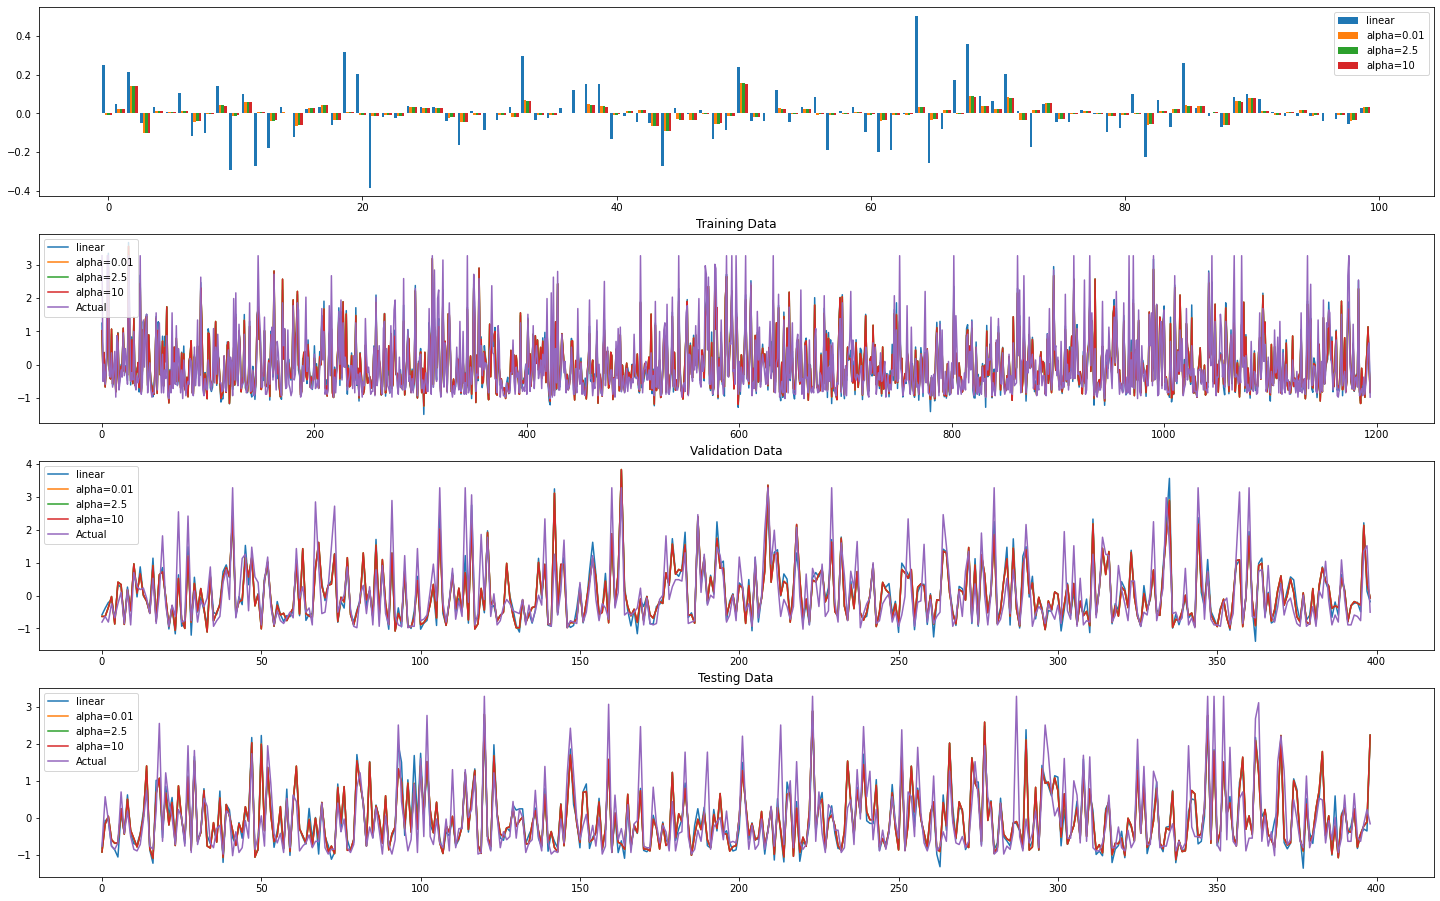

In [40]:
ridge_model_1 = Ridge(fit_intercept=False, alpha=130).fit(X = X_train_std, y = Y_train_std)
ridge_model_2 = Ridge(fit_intercept=False, alpha=140).fit(X = X_train_std, y = Y_train_std)
ridge_model_3 = Ridge(fit_intercept=False, alpha=145).fit(X = X_train_std, y = Y_train_std)

fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
w = 0.2
pos = np.arange(0, len(linear.coef_), 1)
ax.bar(pos - w*2, linear.coef_, width=w, label='linear')
ax.bar(pos - w, ridge_model_1.coef_, width=w, label='alpha=0.01')
ax.bar(pos, ridge_model_2.coef_, width=w, label='alpha=2.5')
ax.bar(pos + w, ridge_model_3.coef_, width=w, label='alpha=10')
ax.legend()
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train_std), label='linear')
ax.plot(ridge_model_1.predict(X_train_std), label='alpha=0.01')
ax.plot(ridge_model_2.predict(X_train_std), label='alpha=2.5')
ax.plot(ridge_model_3.predict(X_train_std), label='alpha=10')
ax.plot(Y_train_std, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val_std), label='linear')
ax.plot(ridge_model_1.predict(X_val_std), label='alpha=0.01')
ax.plot(ridge_model_2.predict(X_val_std), label='alpha=2.5')
ax.plot(ridge_model_3.predict(X_val_std), label='alpha=10')
ax.plot(Y_val_std, label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test_std), label='linear')
ax.plot(ridge_model_1.predict(X_test_std), label='alpha=0.01')
ax.plot(ridge_model_2.predict(X_test_std), label='alpha=2.5')
ax.plot(ridge_model_3.predict(X_test_std), label='alpha=10')
ax.plot(Y_test_std, label='Actual')
ax.set_title('Testing Data')
ax.legend();
print('linear RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, linear.predict(X_val_std)))))
print('ridge_mode_1 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, ridge_model_1.predict(X_val_std)))))
print('ridge_mode_2 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, ridge_model_2.predict(X_val_std)))))
print('ridge_mode_3 RMSE = {}'.format(
np.sqrt(mean_squared_error(Y_val_std, ridge_model_3.predict(X_val_std)))))